## The Ideal Regenerative Rankine Cycle
Consider a steam power plant operating on the ideal regenerative Rankine cycle with one open feedwater heater. Here are the states:



- (1) after the condenser, entering the pump;
- (2) after the pump, entering the feedwater heater;
- (3) after the feedwater heater, entering the second pump;
- (4) after the second pump, entering the boiler;
- (5) after the boiler, entering the turbine;
- (6) after the turbine, entering the feedwater heater;
- (7) after the turbine, entering the condenser.

Steam enters the high-pressure turbine at $p_5$ and $T_5$.

Steam then enters the feedwater heater at $p_6$.

Steam is then condensed in the condenser at a pressure of $p_7$. 

Determine:
- the fraction of steam extracted from the turbine, $y$;
- the thermal efficiency of this cycle, $\eta_\text{th}$.

We are given information about the temperature and pressure of the water exiting the boiler and entering the turbine (state 5):

In [4]:
T5_C = 600
p5_MPa = 15

# conversion 
T5_K = T5_C + 273.15

We are also given the pressure at both exits of the turbine, $p_6$ and $p_7$:

In [5]:
p6_MPa = 1.2
p7_MPa = 10/1000

We also know that the quality of the water at the exit of the condenser and open feed water heater (FWH) are zero (saturated liquids): $x_1$ and $x_3$. 

In [6]:
x1 = 0
x3 = 0

### Solution
A steam power plant operates on the ideal regenerative Rankine cycle with one open feedwater heater. The fraction of steam extracted from the turbine and the thermal efficiency are to be determined. 

### Assumptions
- steady operating conditions exist
- kinetic and potential energy changes are negligible 
- as the power plant operates on the ideal Rankine cycle, we assume that the pump and turbine are isentropic; there are no pressure drops in the boiler and condenser; and steam leaves the condenser and feedwater heater and enters the pump as a saturated liquid at the condenser pressure.

### Analysis


In [7]:
#!pip install iapws
!pip install pyCalor

In [8]:
#from iapws import IAPWS97
from pyCalor import thermo as th

#### Determining properties at state 1:

We assume that there is no pressure drop across the condenser, which is a heat exchanger: $p_1 = p_7$.

In [10]:
# pressure should be in the units MPa, 
# temperature in the units K, 
# quality a number betwee 0 and 1. 
substance = 'water'
p1_MPa = p7_MPa
P1 = p1_MPa
#sat_liquid1 = IAPWS97(P=P1, x=x1)
st1 = th.state(substance,p=(P1,'Mpa'),x=x1,name='1')

From this, we can now calculate $T_1$ (K), $s_1$ (kJ/(kg K)), $h_1$ (kJ/kg), specific volume $v_1$ (m$^3$/kg).

In [11]:
T1 = st1.T # K
s1 = st1.s # kJ/kg*K
h1 = st1.h # kJ/kg
v1 = st1.v # m3/kg

#### State 2

State 2 is after the pump (I), so the pressure is higher ($p_2$), and we will assume that the compressor is isentropic ($s_1 = s_2$):

In [12]:
p2_MPa = p6_MPa
P2 = p2_MPa        # MPa
s2 = s1            # kJ/kg*K

#sat_liquid2 = IAPWS97(P=P2, s=s2)
st2 = th.state(substance,p=(P2,'Mpa'),s=(s2,'kJ/kg K'),name='2')
T2 = st2.T # K
h2 = st2.h # kJ/kg

#### State 3

We can now define state 3 of our regenerative Rankine cycle, which is after the feedwater heater. 

We know 

$$p_3 = p_2 = p_6$$ 

and 

$$\dot{m} h_3  = \dot{m} h_6  y + \dot{m} h_7 (1 - y)$$

In [13]:
p3_MPa = p2_MPa
P3 = p3_MPa # definition of isobaric, MPa

Again, we can calculate the properties at this state as:

In [14]:
#liquid = IAPWS97(P=P3, x=x3)
st3 = th.state(substance,p=(P3,'Mpa'),x=x3,name='3')
T3 = st3.T
h3 = st3.h # kJ/kg
s3 = st3.s # kJ/kg*K
v3 = st3.v

#### State 4

Determining state 4. We can assume the pump operates isentropically:

In [16]:
s4 = s3

p4_MPa = p5_MPa
P4 = p4_MPa

#liquid4 = IAPWS97(P=P4, s=s4)
st4 = th.state(substance,p=(P4,'Mpa'),s=(s4,'kJ/kg K'),name='4')

T4 = st4.T # K
h4 = st4.h # kJ/kg
#x4 = st4.x

#### State 5

We are given the properties of state 5:

In [17]:
P5 = p5_MPa
T5 = T5_K

#steam = IAPWS97(P=P5,T=T5)
st5 = th.state(substance,p=(P5,'Mpa'),T=(T5_K,'K'),name='5')
h5 = st5.h # kJ/kg
s5 = st5.s #kJ/kg/K

#### State 6

We assume that the turbine operates isentropically, therefore $s_6 = s_5$. We also recall that $p_3 = p_2 = p_6$ 

In [18]:
s6 = s5

P6 = P2
#sat_liquid6 = IAPWS97(P=P6, s=s6)
st6 = th.state(substance,p=(P6,'Mpa'),s=(s6,'kJ/kg K'),name='6')

h6 = st6.h
x6 = st6.x
T6 = st6.T

#### State 7

The final state can be determined from:

In [19]:
s7 = s5
P7 = p7_MPa

#sat_liquid7 = IAPWS97(P=P7, s=s7)
st7 = th.state(substance,p=(P7,'Mpa'),s=(s7,'kJ/kg K'),name='7')
h7 = st7.h
x7 = st7.x
T7 = st7.T

$y$ is the fraction of steam extracted from the turbine, $y = \frac{\dot{m}_6}{\dot{m}_5}$.

We can analyze the Open FWH. If we say that the energy leaving that control volume is 

$$\dot{m}_5 h_3 $$ 

and that entering the control volume is 

$$\dot{m}_6 h_6 $$ 

and is 

$$\dot{m}_7 h_7$$

and assuming steady state, we can write: 

$$y = \frac{h_3 - h_2}{h_6 - h_2} $$

In [20]:
y = (h3- h2)/(h6 - h2)
print('(a) The value of y is: {0:1.2f} (-)'.format(y))

(a) The value of y is: 0.23 (-)


The steam enters the condenser where it is cooled, condensing back into a liquid, where is it is then pumped by the compressor back into the boiler. The amount of heat removed by the condenser can be calculated as ($Q_{\text{c}}$):

In [21]:
Qc = (1-y)*(h7 - h1) # kJ/kg
print('The condenser heat duty is {0:1.2f} kJ/kg'.format(Qc))

The condenser heat duty is 1486.68 kJ/kg


In [22]:
Qb = (h5 - h4) # heat required to make the steam, kJ/kg

print('The boiler heat duty is: {0:1.2f} kJ/kg'.format(Qb))

The boiler heat duty is: 2769.16 kJ/kg


The efficiency of the Rankine cycle can be calculated then as:

In [23]:
eta = 1 - Qc/Qb
print('(b) The overall efficiency is {0:1.2%}.'.format(eta))

(b) The overall efficiency is 46.31%.


It is instructive to compare the efficiency we calculated here with the Carnot efficiency. Recall that:

$\eta_\text{Carnot} = 1 - \frac{T_\text{C}}{T_\text{H}}$.

In [24]:
TC_K = T1
TH_K = T5

In [25]:
eta_carnot = 1 - TC_K / TH_K

print('The Carnot efficiency of this power plant is {0:1.2%}.'.format(eta_carnot))

The Carnot efficiency of this power plant is 63.47%.


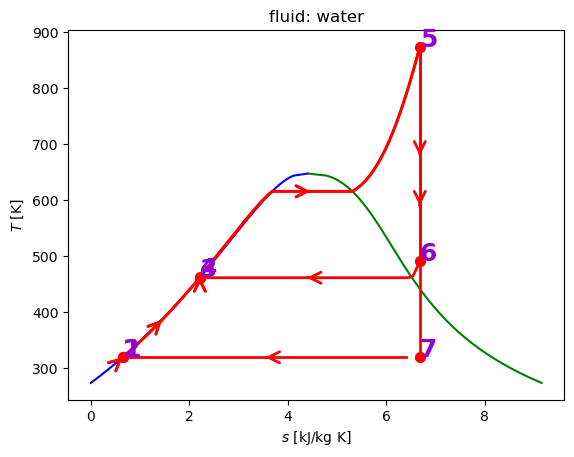

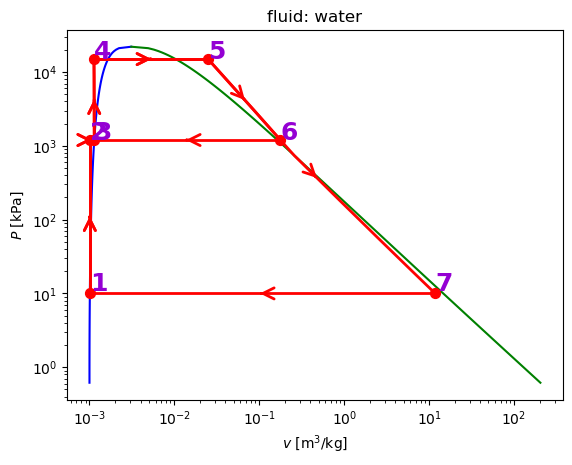

In [30]:
#pr = th.process([(st1,st2),(st2,st3),(st3,st4),(st4,st5),(st5,st7),(st7,st1)])
pr = th.process([(st1,st2),(st2,st3),(st3,st4),(st4,st5),(st5,st7),(st7,st1),(st1,st2),(st2,st3),(st3,st4),(st4,st5),(st5,st6),(st6,st3)])
fig1 = pr.plot('Ts');
fig2 = pr.plot('pv');